In [11]:
import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
languages_data_folder = 'paragraphs'
dataset = load_files(languages_data_folder)

In [40]:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.3)
# we are using 50% test size so the rest go to training

In [41]:
# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
vectorizer = TfidfVectorizer(ngram_range=(1, 4), analyzer='char',
                             use_idf=False)

In [42]:
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
clf = Pipeline([
    ('vec', vectorizer),
    ('clf', Perceptron(tol=1e-3)),
])

In [43]:
# TASK: Fit the pipeline on the training set
clf.fit(docs_train, y_train)

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
   ..._jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False))])

In [44]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = clf.predict(docs_test)


In [45]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

         ar       1.00      1.00      1.00         6
         de       0.98      1.00      0.99        44
         en       1.00      1.00      1.00        51
         es       1.00      0.98      0.99        44
         fr       1.00      0.97      0.99        37
         it       0.94      0.94      0.94        17
         ja       1.00      1.00      1.00        20
         nl       1.00      0.92      0.96        13
         pl       1.00      1.00      1.00        11
         pt       1.00      1.00      1.00        30
         ru       0.91      1.00      0.95        21

avg / total       0.99      0.99      0.99       294



In [46]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[ 6  0  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0  1]
 [ 0  0  0  0 36  1  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  1]
 [ 0  0  0  0  0  0 20  0  0  0  0]
 [ 0  1  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0 11  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  0  0  0 21]]


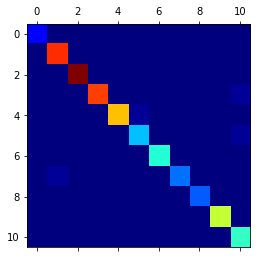

In [47]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)

In [48]:
# Predict the result on some short new sentences:
sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de d\xe9tection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.',
]
predicted = clf.predict(sentences)

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))

The language of "This is a language detection test." is "en"
The language of "Ceci est un test de détection de la langue." is "fr"
The language of "Dies ist ein Test, um die Sprache zu erkennen." is "de"


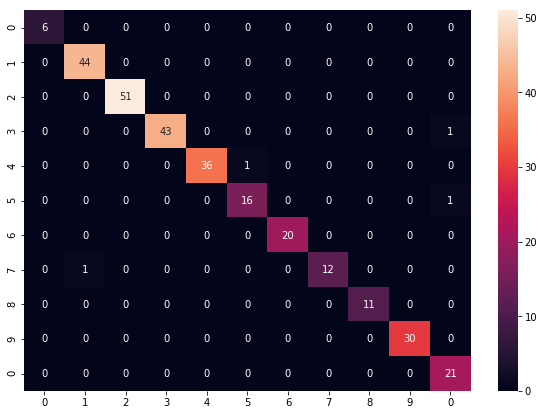

In [50]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = cm
df_cm = pd.DataFrame(array, index = [i for i in "01234567890"],
                  columns = [i for i in "01234567890"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)